![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

**Importing the required Libraries**

In [1]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


Doing the beforehand exploration of the data

In [2]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB


In [3]:
crimes.describe()

,DR_NO,Vict Age
count,1.857150e+05,185715.000000
mean,2.255781e+08,39.999257
std,5.017438e+06,15.450227
min,2.009072e+08,2.000000
25%,2.210108e+08,28.000000
50%,2.220114e+08,37.000000
75%,2.310044e+08,50.000000
max,2.399097e+08,99.000000


In [4]:
crimes.isna().any()

DR_NO           False
Date Rptd       False
DATE OCC        False
TIME OCC        False
AREA NAME       False
Crm Cd Desc     False
Vict Age        False
Vict Sex         True
Vict Descent     True
Weapon Desc      True
Status Desc     False
LOCATION        False
dtype: bool

In [5]:
crimes.isna().sum()

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex            11
Vict Descent        10
Weapon Desc     112213
Status Desc          0
LOCATION             0
dtype: int64

**combining the victim's descent and the location to see which descent is populated at what location.**

**Finding out the threshold**

In [6]:
overall_threshold = len(crimes)*0.05
print(overall_threshold)

9285.75


In [7]:
cols_missing = crimes.columns[crimes.isna().sum()<= overall_threshold]
print(cols_missing)
crimes.dropna(subset = cols_missing, inplace = True)
print(crimes.isna().any())

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Status Desc',
       'LOCATION'],
      dtype='object')
DR_NO           False
Date Rptd       False
DATE OCC        False
TIME OCC        False
AREA NAME       False
Crm Cd Desc     False
Vict Age        False
Vict Sex        False
Vict Descent    False
Weapon Desc      True
Status Desc     False
LOCATION        False
dtype: bool


**Finding out the counts for the columns**

In [8]:
print(crimes["Vict Sex"].value_counts())
print(crimes["Vict Age"].value_counts())
print(crimes["Status Desc"].value_counts())
print(crimes["Weapon Desc"].value_counts())
print(crimes["AREA NAME"].value_counts())

M    93008
F    89853
X     2812
H       30
Name: Vict Sex, dtype: int64
30    5715
35    5697
32    5481
31    5472
29    5438
      ... 
96      27
95      25
94      23
97      22
98      17
Name: Vict Age, Length: 98, dtype: int64
Invest Cont     153780
Adult Other      17722
Adult Arrest     13395
Juv Arrest         492
Juv Other          312
UNK                  2
Name: Status Desc, dtype: int64
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    39887
UNKNOWN WEAPON/OTHER WEAPON                        7376
VERBAL THREAT                                      5894
HAND GUN                                           4394
KNIFE WITH BLADE 6INCHES OR LESS                   1608
                                                  ...  
ANTIQUE FIREARM                                       3
RELIC FIREARM                                         1
M-14 SEMIAUTOMATIC ASSAULT RIFLE                      1
BOWIE KNIFE                                           1
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON

**Finding out which hour has the highest frequency of crimes**

In [9]:
crimes["TIME OCC"].head()

0    1110
1    1620
2    1200
3    0635
4    0900
Name: TIME OCC, dtype: object

In [10]:
crimes["hour_occ"] = crimes["TIME OCC"].str[:2].astype(int)
peak_crime_hour = crimes["hour_occ"].value_counts(sort = True).index[0]
print(peak_crime_hour)

12


**Counting how many crimes occured at a particular hour and grouping them by their status description.**

In [11]:
crimes.groupby("Status Desc")["hour_occ"].value_counts()



Status Desc   hour_occ
Adult Arrest  20          751
              21          726
              12          719
              17          718
              18          696
                         ... 
Juv Other     6             3
              5             2
              4             1
UNK           13            1
              15            1
Name: hour_occ, Length: 122, dtype: int64

**Finding what was the peak location for the crimes**

In [12]:
filtered_crimes = crimes[(crimes["hour_occ"] >= 22) | (crimes["hour_occ"] <= 4)] # Doing the boolean Filtering
peak_location = filtered_crimes.groupby("AREA NAME")["hour_occ"].count()
peak_night_crime_location = str(peak_location.idxmax())
print(peak_night_crime_location)

Central


In [13]:
crimes_sorted = crimes["Vict Age"].sort_values()
print(crimes_sorted)

143485     2
92724      2
21802      2
87844      2
127564     2
          ..
160155    99
69973     99
109411    99
86750     99
85838     99
Name: Vict Age, Length: 185703, dtype: int64


**Finding out the number of crimes against different age groups**

In [14]:
# Create bins and labels for victim age ranges
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Add a new column using pd.cut() to bin values into discrete intervals
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"],
                               bins=age_bins,
                               labels=age_labels)

# Find the category with the largest frequency
victim_ages = crimes["Age Bracket"].value_counts()
print(victim_ages)


26-34    47470
35-44    42155
45-54    28353
18-25    28283
55-64    20168
65+      14746
0-17      4528
Name: Age Bracket, dtype: int64


**Plotting a bar plot that shows the the number of crimes against the different age groups.**

In [22]:
crimes = crimes[crimes["Vict Sex"]!= "H"]

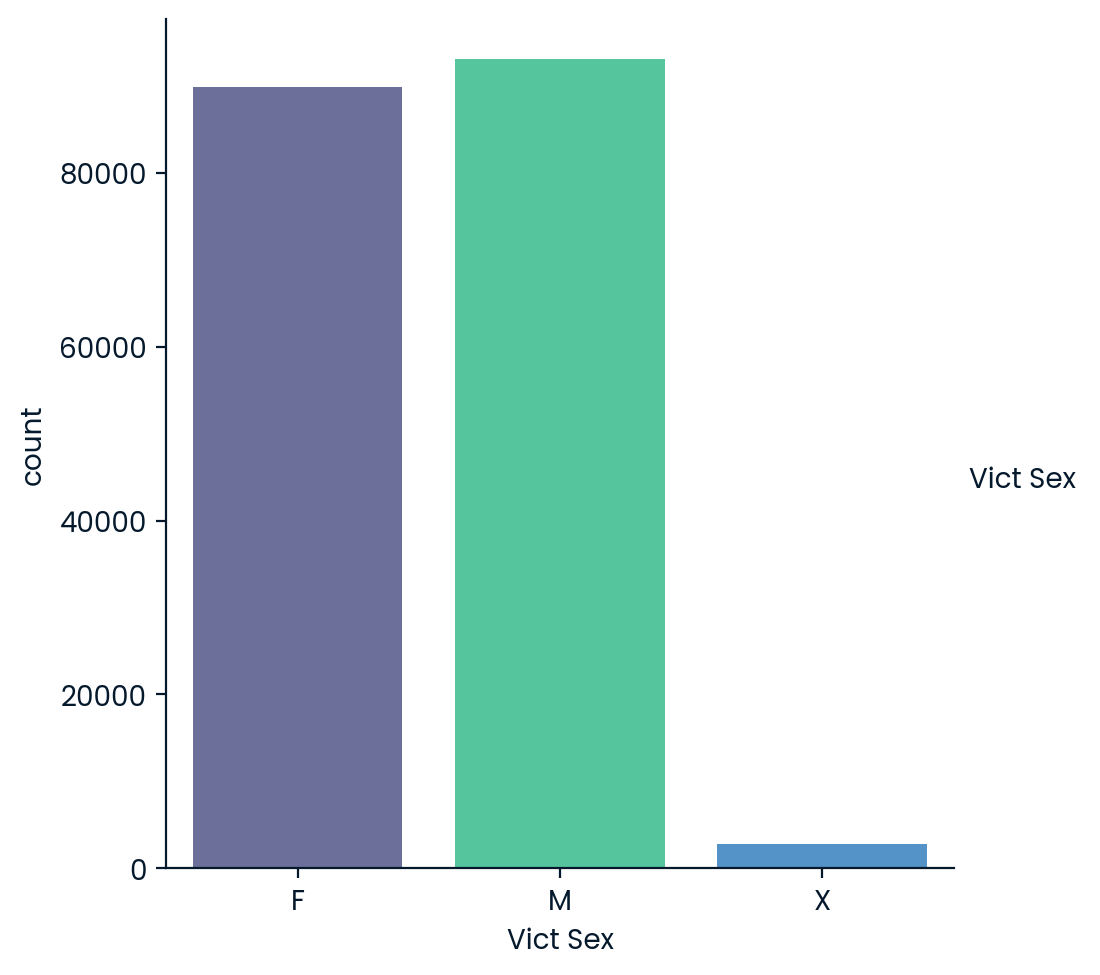

In [23]:
sns.catplot(x = "Vict Sex", data  = crimes, kind = "count", hue = "Vict Sex")
plt.show()

**Plotting a count plot on status description categorizing them on different genders**

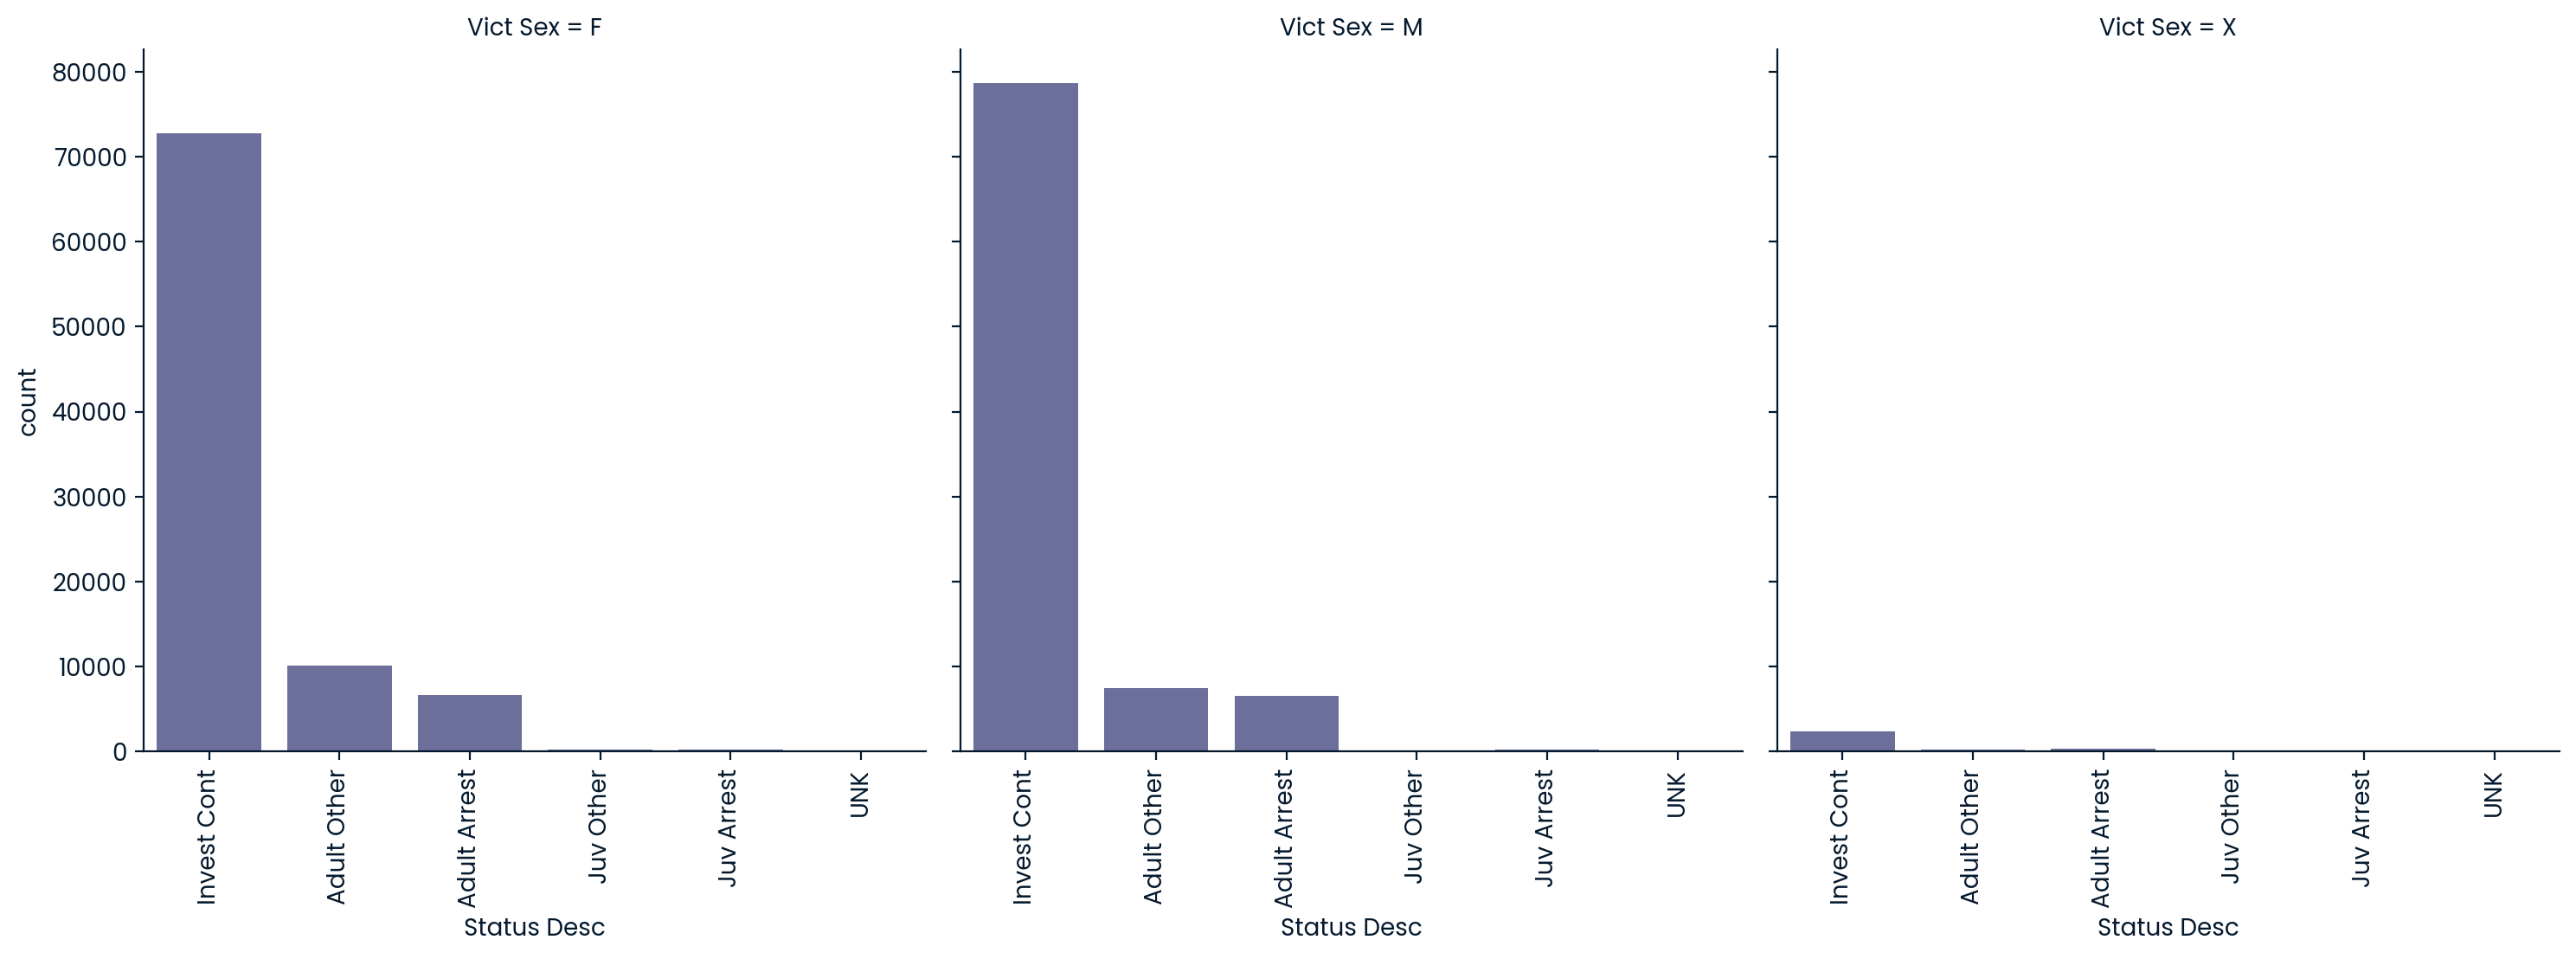

In [24]:
g = sns.catplot(data = crimes, x = "Status Desc", kind = "count", col= "Vict Sex")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.xticks(rotation = 90)
plt.show()

**Finding out the delay between the crimes date reported and date occured**

In [25]:
# Ensure that both columns are in datetime format
crimes["Date Rptd"] = pd.to_datetime(crimes["Date Rptd"])
crimes["DATE OCC"] = pd.to_datetime(crimes["DATE OCC"])

# Calculate the time difference in days
crimes["time_difference"] = (crimes["Date Rptd"] - crimes["DATE OCC"]).dt.days
print(crimes["time_difference"].sort_values(ascending=False).head())


#using .loc to filter rows and select columns for the maximum delay 
max_time_difference = crimes["time_difference"].max()
sorted_crimes = crimes.loc[crimes["time_difference"] == max_time_difference]
print(sorted_crimes[["Vict Sex", "time_difference", "Vict Age", "AREA NAME"]])

695    1275
694    1272
708    1269
701    1269
700    1259
Name: time_difference, dtype: int64
    Vict Sex  time_difference  Vict Age AREA NAME
695        F             1275        12   Topanga


**Plotting a box plot between Vict Age and Vict Sex**

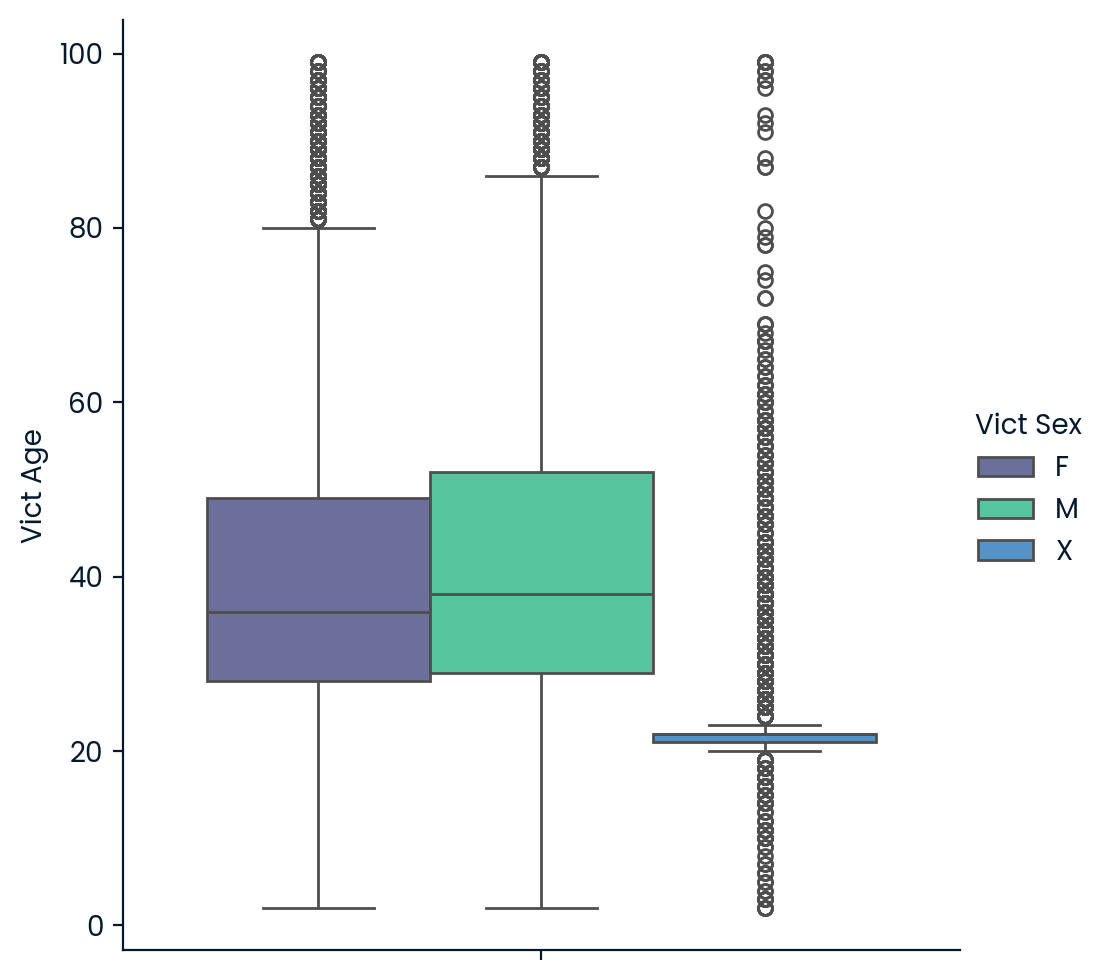

In [26]:
sns.catplot(data = crimes, y= "Vict Age", kind = "box", hue = "Vict Sex")
plt.show()

**Plotting a Kernel density plot to show which age group is most victimized.**

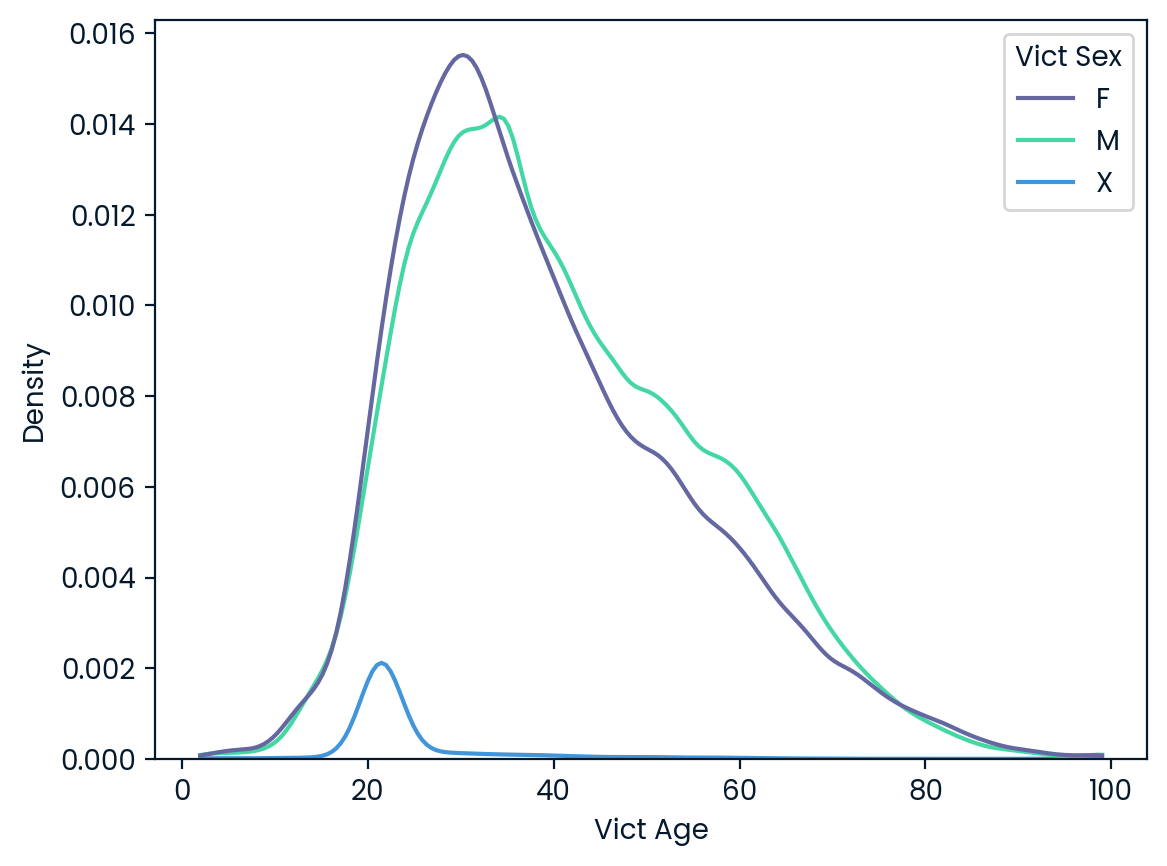

In [27]:
sns.kdeplot(data = crimes, x = "Vict Age", hue = "Vict Sex", cut =0)
plt.show()

**Showing the average time delay between the crime's date reported and date occured.**

        month  time_difference
0  1900-01-01        28.515558
1  1900-02-01        16.240881
2  1900-03-01        18.274401
3  1900-04-01        15.502629
4  1900-05-01        14.050814
5  1900-06-01         8.764209
6  1900-07-01        13.425423
7  1900-08-01        12.556198
8  1900-09-01        12.342394
9  1900-10-01        11.879269
10 1900-11-01        13.105871
11 1900-12-01        11.808960


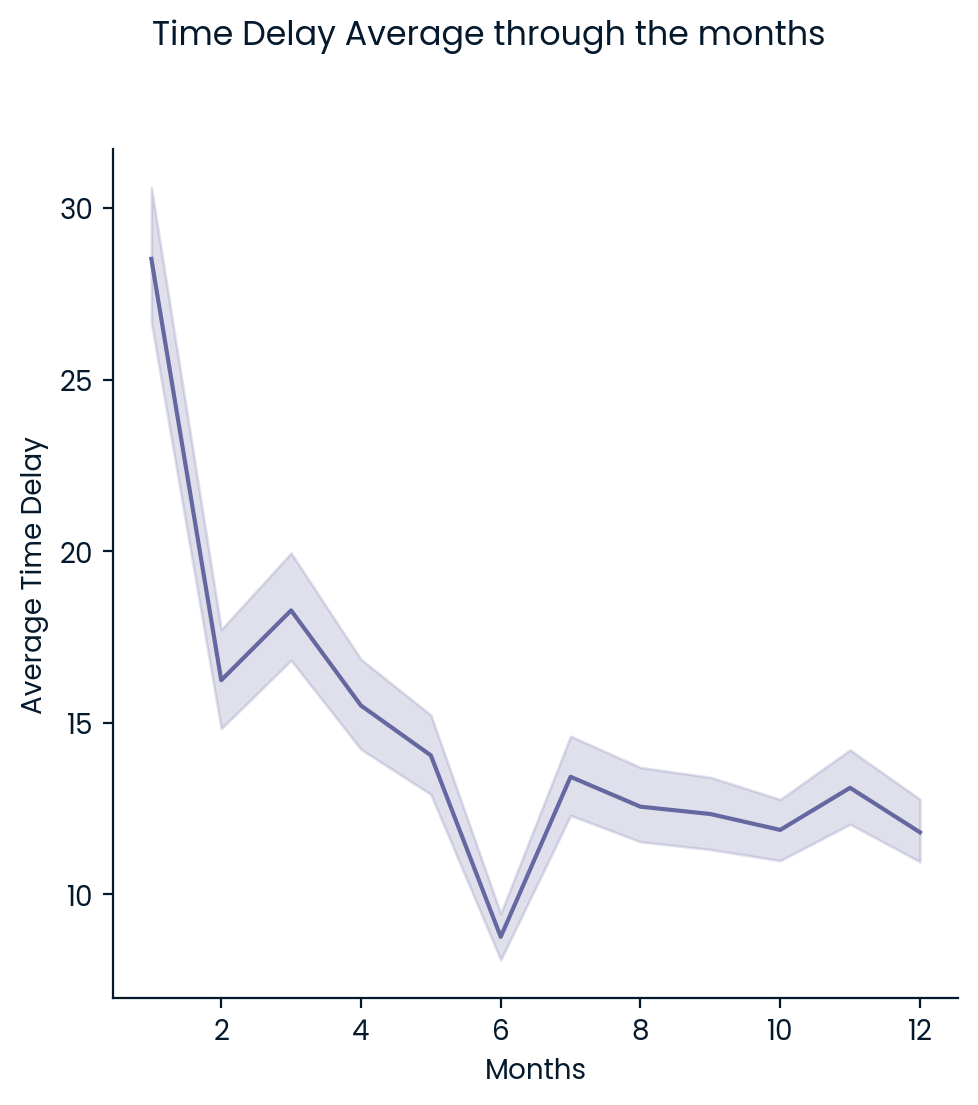

In [28]:
crimes["month"] = crimes["DATE OCC"].dt.month
delay_trend = crimes.groupby("month")["time_difference"].mean().reset_index()
delay_trend["month"] = delay_trend["month"].astype(str)
delay_trend["month"] = pd.to_datetime(delay_trend["month"], format='%m')

print(delay_trend)

g = sns.relplot(data = crimes, x= "month", y= "time_difference", kind = "line", markers= True)
g.fig.suptitle("Time Delay Average through the months", y = 1.1)
g.set(xlabel = "Months", ylabel = "Average Time Delay")